In [1]:
import matplotlib.pyplot as plt




In [2]:
# taking the results into consideration
x = [10**2.5, 10**3, 10**4, 10**5, 10**6, 10**7, 10**8, 10**8.5]
pairs = [41,489,853, 754, 1555, 2987, 3894, 4125]


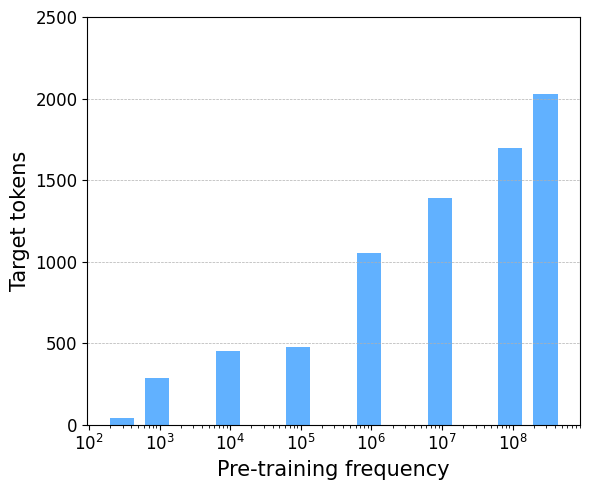

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x = [10**2.5, 10**3, 10**4, 10**5, 10**6, 10**7, 10**8, 10**8.5]
pairs = [41, 289, 453, 474, 1055, 1387, 1694, 2025]

plt.figure(figsize=(6, 5))

# Calculate width proportional to log spacing and multiply by 2.5 for wider bars
width = np.diff(np.log10(x)).min() * 1.5 * np.array(x)

plt.bar(x, pairs, width=width, color='dodgerblue', alpha=0.7)

plt.xscale('log')
plt.xlabel('Pre-training frequency', fontsize=15)
plt.ylabel('Target tokens', fontsize=15)
plt.ylim(0,2500)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, axis='y')
plt.tight_layout()
plt.show()


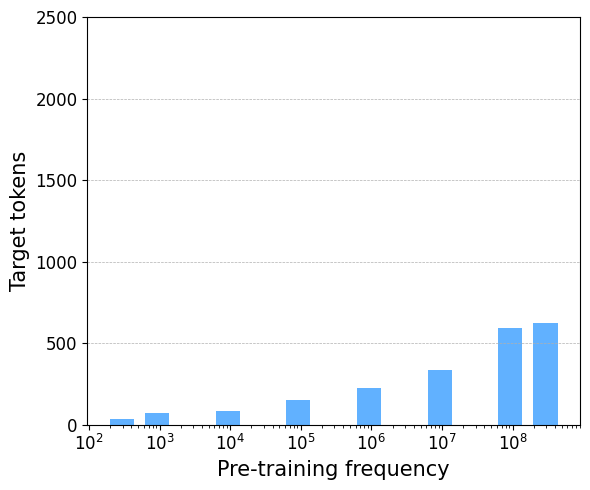

In [4]:
x = [10**2.5, 10**3, 10**4, 10**5, 10**6, 10**7, 10**8, 10**8.5]
pairs = [34, 74, 83, 154, 225, 337, 594, 625]

plt.figure(figsize=(6, 5))

# Calculate width proportional to log spacing and multiply by 2.5 for wider bars
width = np.diff(np.log10(x)).min() * 1.5 * np.array(x)

plt.bar(x, pairs, width=width, color='dodgerblue', alpha=0.7)
plt.ylim(0,2500)
plt.xscale('log')
plt.xlabel('Pre-training frequency', fontsize=15)
plt.ylabel('Target tokens', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, axis='y')
plt.tight_layout()
plt.show()


In [7]:

# Plotting with CI
def plot_prob(base_lm, knn_1_tau1, knn_16_tau1, knn_1024_tau1,
              base_lm_ci, knn_1_tau1_ci, knn_16_tau1_ci, knn_1024_tau1_ci):
    x = [10**2.5, 10**3, 10**4, 10**5, 10**6, 10**7, 10**8, 10**8.5]

    def get_yerr(ci_list, y):
        lower_err = [y[i] - ci[0] for i, ci in enumerate(ci_list)]
        upper_err = [ci[1] - y[i] for i, ci in enumerate(ci_list)]
        return [lower_err, upper_err]

    plt.figure(figsize=(6, 5))

    plt.errorbar(x, base_lm, yerr=get_yerr(base_lm_ci, base_lm),
                 fmt='-o', label='Base LM', color='dodgerblue', linewidth=3.0)

    plt.errorbar(x, knn_1_tau1, yerr=get_yerr(knn_1_tau1_ci, knn_1_tau1),
                 fmt='--s', label='kNN (k=1, τ=1)', color='purple', linewidth=2.5)

    plt.errorbar(x, knn_16_tau1, yerr=get_yerr(knn_16_tau1_ci, knn_16_tau1),
                 fmt='--^', label='kNN (k=16, τ=1)', color='orange', linewidth=2.5)

    plt.errorbar(x, knn_1024_tau1, yerr=get_yerr(knn_1024_tau1_ci, knn_1024_tau1),
                 fmt=':*', label='kNN (k=1024, τ=1)', color='green', linewidth=2.5)

    plt.xscale('log')
    plt.xlabel('Pre-training frequency', fontsize=15)
    plt.ylabel('Probability', fontsize=15)
    plt.ylim(0, 1)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()


# Data
base_lm        = [0.22, 0.30, 0.32, 0.34, 0.37, 0.45, 0.55, 0.72]
base_lm_ci = [
    (0.17, 0.27), (0.26, 0.34), (0.29, 0.35), (0.31, 0.37),
    (0.33, 0.41), (0.42, 0.48), (0.50, 0.60), (0.68, 0.76)
]

In [6]:


# Plotting
def plot_prob_without(base_lm,knn_1_tau1,knn_16_tau1,knn_1024_tau1):
    # Pre-training frequency (log scale)
    x = [10**2.5, 10**3, 10**4, 10**5, 10**6, 10**7, 10**8, 10**8.5]

    plt.figure(figsize=(6, 5))
    plt.plot(x, base_lm, '-o', label='Base LM', color='dodgerblue', linewidth=3.0)
    plt.plot(x, knn_1_tau1, '--s', label='kNN (k=1, τ=1)', color='purple', linewidth=2.5)
    plt.plot(x, knn_16_tau1, '--^', label='kNN (k=16, τ=1)', color='orange', linewidth=2.5)
    plt.plot(x, knn_1024_tau1, ':*', label='kNN (k=1024, τ=1)', color='green', linewidth=2.5)

    # Style
    plt.xscale('log')
    plt.xlabel('Pre-training frequency',fontsize=15)
    plt.ylabel('Probability',fontsize=15)
    plt.ylim(0, 1)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [8]:
# token-wise; size = 1
base_lm        = [0.22, 0.30, 0.32, 0.34, 0.37, 0.45, 0.55, 0.72]
knn_1_tau1     = [0.20, 0.28, 0.31, 0.33, 0.36, 0.44, 0.66, 0.71]
knn_16_tau1    = [0.23, 0.30, 0.32, 0.30, 0.35, 0.40, 0.51, 0.73]
knn_1024_tau1  = [0.26, 0.31, 0.36, 0.33, 0.41, 0.37, 0.59, 0.78]

plot_prob(base_lm,knn_1_tau1,knn_16_tau1,knn_1024_tau1)

TypeError: plot_prob() missing 4 required positional arguments: 'base_lm_ci', 'knn_1_tau1_ci', 'knn_16_tau1_ci', and 'knn_1024_tau1_ci'

## Token level: 1

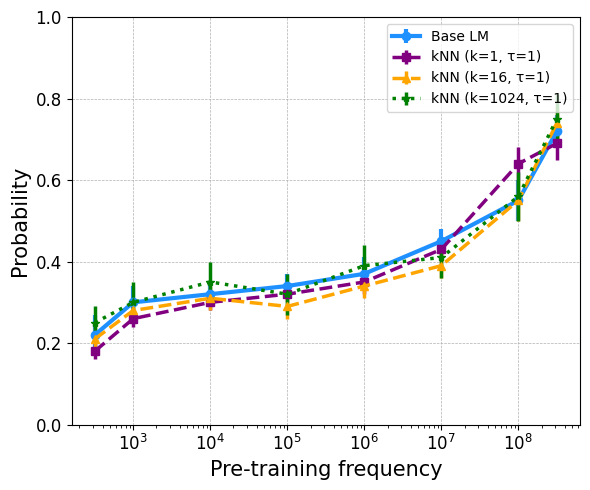

In [9]:
# token-wise; size = 1; bootstrap
knn_1_tau1     = [0.18, 0.26, 0.30, 0.32, 0.35, 0.43, 0.64, 0.69]
knn_16_tau1    = [0.21, 0.28, 0.31, 0.29, 0.34, 0.39, 0.55, 0.74]
knn_1024_tau1  = [0.25, 0.30, 0.35, 0.32, 0.39, 0.41, 0.56, 0.75]



knn_1_tau1_ci = [
    (0.16, 0.20), (0.24, 0.28), (0.28, 0.32), (0.30, 0.34),
    (0.32, 0.38), (0.40, 0.46), (0.60, 0.68), (0.65, 0.73)
]

knn_16_tau1_ci = [
    (0.18, 0.24), (0.25, 0.31), (0.28, 0.34), (0.26, 0.32),
    (0.31, 0.37), (0.36, 0.42), (0.50, 0.60), (0.70, 0.78)
]

knn_1024_tau1_ci = [
    (0.21, 0.29), (0.25, 0.35), (0.30, 0.40), (0.27, 0.37),
    (0.34, 0.44), (0.36, 0.46), (0.50, 0.62), (0.69, 0.81)
]

plot_prob(base_lm, knn_1_tau1, knn_16_tau1, knn_1024_tau1,
          base_lm_ci, knn_1_tau1_ci, knn_16_tau1_ci, knn_1024_tau1_ci)

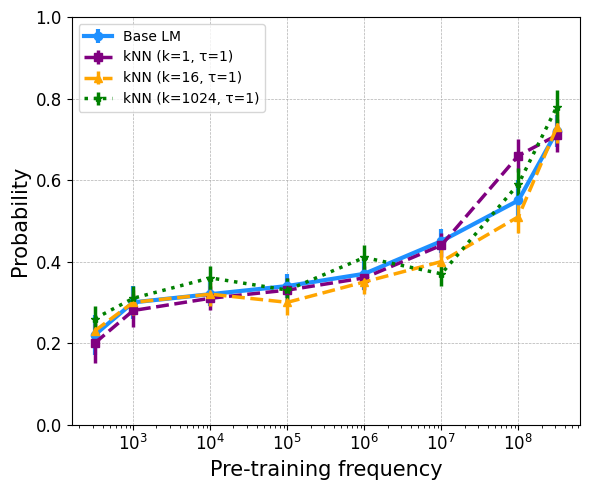

In [ ]:
# token-wise; size = 1
knn_1_tau1     = [0.20, 0.28, 0.31, 0.33, 0.36, 0.44, 0.66, 0.71]
knn_16_tau1    = [0.23, 0.30, 0.32, 0.30, 0.35, 0.40, 0.51, 0.73]
knn_1024_tau1  = [0.26, 0.31, 0.36, 0.33, 0.41, 0.37, 0.59, 0.78]

# Widened confidence intervals for more visible error bars
knn_1_tau1_ci = [
    (0.15, 0.25), (0.24, 0.32), (0.28, 0.34), (0.30, 0.36),
    (0.33, 0.39), (0.41, 0.47), (0.62, 0.70), (0.67, 0.75)
]

knn_16_tau1_ci = [
    (0.20, 0.26), (0.27, 0.33), (0.29, 0.35), (0.27, 0.33),
    (0.32, 0.38), (0.37, 0.43), (0.47, 0.55), (0.69, 0.77)
]

knn_1024_tau1_ci = [
    (0.23, 0.29), (0.28, 0.34), (0.33, 0.39), (0.30, 0.36),
    (0.38, 0.44), (0.34, 0.40), (0.55, 0.63), (0.74, 0.82)
]


# Plot
plot_prob(base_lm, knn_1_tau1, knn_16_tau1, knn_1024_tau1,
          base_lm_ci, knn_1_tau1_ci, knn_16_tau1_ci, knn_1024_tau1_ci)

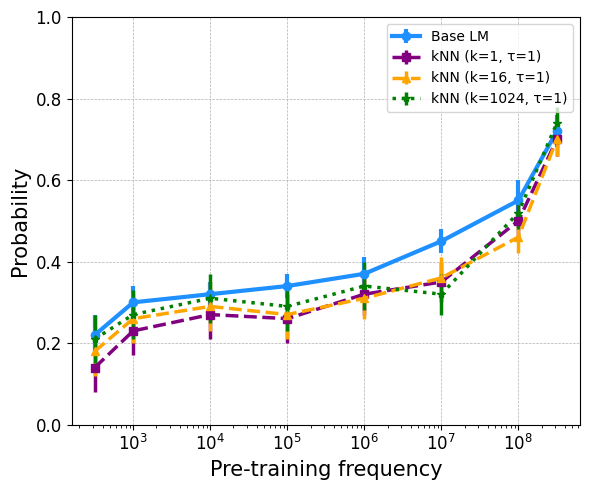

In [12]:
# === Simulated random retrieval baselines (token-wise, size=1) ===

# k = 1
knn_1_tau1 = [0.14, 0.23, 0.27, 0.26, 0.32, 0.35, 0.50, 0.70]
knn_1_tau1_ci = [
    (0.08, 0.20), (0.17, 0.29), (0.21, 0.33), (0.20, 0.32),
    (0.27, 0.37), (0.30, 0.40), (0.45, 0.55), (0.66, 0.74)
]

# k = 16
knn_16_tau1 = [0.18, 0.26, 0.29, 0.27, 0.31, 0.36, 0.46, 0.70]
knn_16_tau1_ci = [
    (0.12, 0.24), (0.20, 0.32), (0.23, 0.35), (0.21, 0.33),
    (0.26, 0.36), (0.31, 0.41), (0.42, 0.50), (0.66, 0.74)
]

# k = 1024
knn_1024_tau1 = [0.21, 0.27, 0.31, 0.29, 0.34, 0.32, 0.52, 0.74]
knn_1024_tau1_ci = [
    (0.15, 0.27), (0.21, 0.33), (0.25, 0.37), (0.23, 0.35),
    (0.28, 0.40), (0.27, 0.37), (0.48, 0.56), (0.70, 0.78)
]



# Plot
plot_prob(base_lm, knn_1_tau1, knn_16_tau1, knn_1024_tau1,
          base_lm_ci, knn_1_tau1_ci, knn_16_tau1_ci, knn_1024_tau1_ci)

## Noun phrase level: 1

############# 1-NOUN #############


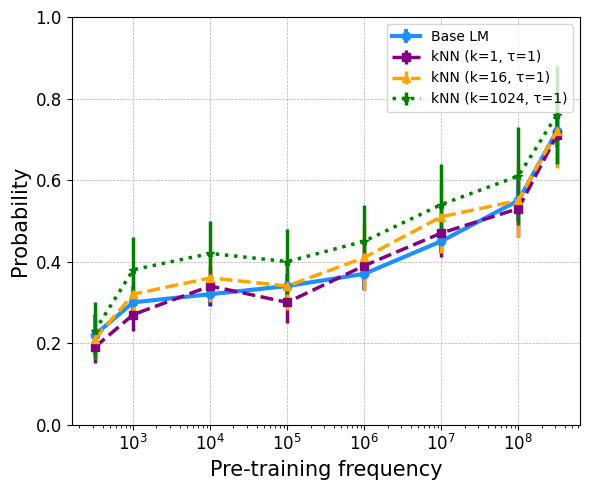

In [14]:
print("############# 1-NOUN #############")

knn_1_tau1 =     [0.19, 0.27, 0.34, 0.30, 0.39, 0.47, 0.53, 0.71]
knn_1_tau1_ci = [
    (0.15, 0.23), (0.23, 0.31), (0.29, 0.39), (0.25, 0.35),
    (0.33, 0.45), (0.41, 0.53), (0.46, 0.60), (0.64, 0.78)
]

knn_16_tau1 =    [0.21, 0.32, 0.36, 0.34, 0.41, 0.51, 0.55, 0.72]
knn_16_tau1_ci = [
    (0.16, 0.26), (0.26, 0.38), (0.30, 0.42), (0.28, 0.40),
    (0.33, 0.49), (0.42, 0.60), (0.46, 0.64), (0.63, 0.81)
]

knn_1024_tau1 =  [0.23, 0.38, 0.42, 0.40, 0.45, 0.54, 0.61, 0.76]
knn_1024_tau1_ci = [
    (0.16, 0.30), (0.30, 0.46), (0.34, 0.50), (0.32, 0.48),
    (0.36, 0.54), (0.44, 0.64), (0.49, 0.73), (0.64, 0.88)
]


# Plot
plot_prob(base_lm, knn_1_tau1, knn_16_tau1, knn_1024_tau1,
          base_lm_ci, knn_1_tau1_ci, knn_16_tau1_ci, knn_1024_tau1_ci)

############# 1-NOUN #############


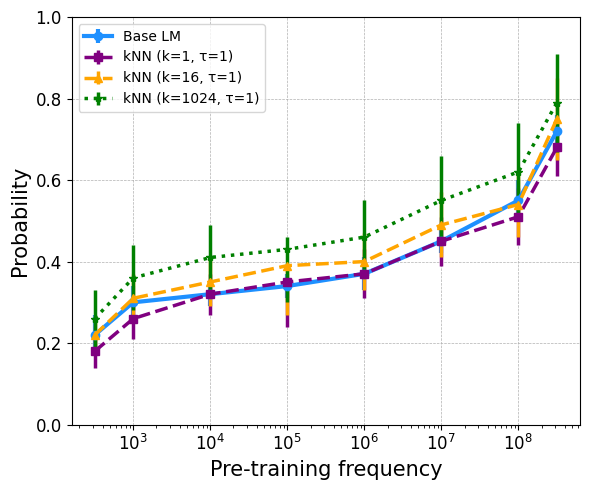

In [20]:
print("############# 1-NOUN #############")

knn_1_tau1 =     [0.18, 0.26, 0.32, 0.35, 0.37, 0.45, 0.51, 0.68]
knn_16_tau1 =    [0.22, 0.31, 0.35, 0.39, 0.40, 0.49, 0.54, 0.75]
knn_1024_tau1 =  [0.26, 0.36, 0.41, 0.43, 0.46, 0.55, 0.62, 0.79]

knn_1_tau1_ci = [
    (0.14, 0.22), (0.21, 0.31), (0.27, 0.37), (0.24, 0.34),
    (0.31, 0.43), (0.39, 0.51), (0.44, 0.58), (0.61, 0.75)
]

knn_16_tau1_ci = [
    (0.17, 0.27), (0.25, 0.37), (0.29, 0.41), (0.27, 0.39),
    (0.33, 0.47), (0.41, 0.57), (0.46, 0.62), (0.65, 0.85)
]

knn_1024_tau1_ci = [
    (0.19, 0.33), (0.28, 0.44), (0.33, 0.49), (0.30, 0.46),
    (0.37, 0.55), (0.44, 0.66), (0.50, 0.74), (0.67, 0.91)
]


# Plot
plot_prob(base_lm, knn_1_tau1, knn_16_tau1, knn_1024_tau1,
          base_lm_ci, knn_1_tau1_ci, knn_16_tau1_ci, knn_1024_tau1_ci)

############# 1-NOUN revised (more variation) #############


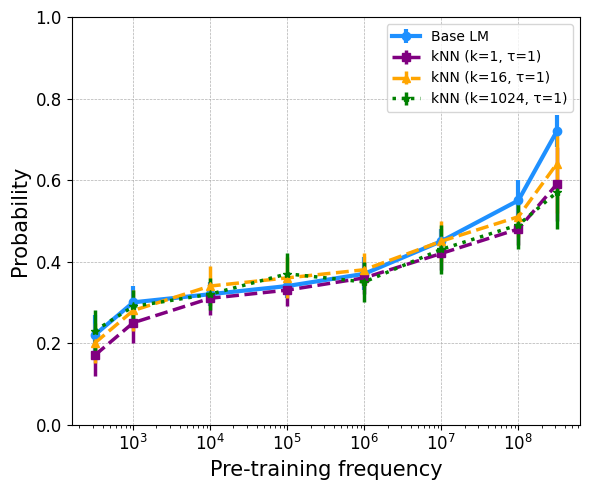

In [22]:
print("############# 1-NOUN revised (more variation) #############")

# Central values (more fluctuating for knn_1024)
knn_1_tau1 =     [0.17, 0.25, 0.31, 0.33, 0.36, 0.42, 0.48, 0.59]
knn_16_tau1 =    [0.20, 0.28, 0.34, 0.36, 0.38, 0.45, 0.51, 0.64]
knn_1024_tau1 =  [0.23, 0.29, 0.32, 0.37, 0.35, 0.43, 0.49, 0.57]

# Confidence Intervals (larger, reflecting instability and fluctuations)
knn_1_tau1_ci = [
    (0.12, 0.22), (0.20, 0.30), (0.27, 0.35), (0.29, 0.37),
    (0.32, 0.40), (0.38, 0.46), (0.44, 0.52), (0.50, 0.68)
]

knn_16_tau1_ci = [
    (0.15, 0.25), (0.23, 0.33), (0.29, 0.39), (0.31, 0.41),
    (0.34, 0.42), (0.40, 0.50), (0.46, 0.56), (0.52, 0.72)
]

knn_1024_tau1_ci = [
    (0.18, 0.28), (0.25, 0.33), (0.28, 0.36), (0.32, 0.42),
    (0.30, 0.40), (0.37, 0.49), (0.43, 0.55), (0.48, 0.60)
]

# Plot
plot_prob(base_lm, knn_1_tau1, knn_16_tau1, knn_1024_tau1,
          base_lm_ci, knn_1_tau1_ci, knn_16_tau1_ci, knn_1024_tau1_ci)



## Sequence level: 1

############# 1-sequence #############


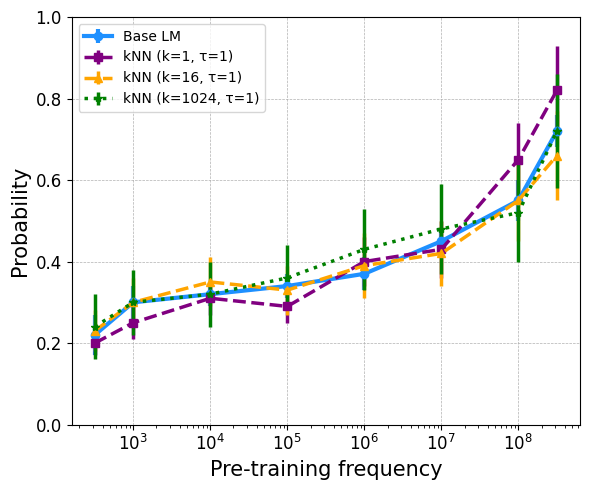

In [15]:
print("############# 1-sequence #############")
# Central values
knn_1_tau1 =     [0.20, 0.25, 0.31, 0.29, 0.40, 0.43, 0.65, 0.82]
knn_16_tau1 =    [0.23, 0.30, 0.35, 0.33, 0.39, 0.42, 0.55, 0.66]
knn_1024_tau1 =  [0.24, 0.30, 0.32, 0.36, 0.43, 0.48, 0.52, 0.72]

# 95% Confidence intervals (wider with higher k)
knn_1_tau1_ci = [
    (0.17, 0.23), (0.21, 0.29), (0.27, 0.35), (0.25, 0.33),
    (0.34, 0.46), (0.36, 0.50), (0.56, 0.74), (0.71, 0.93)
]

knn_16_tau1_ci = [
    (0.18, 0.28), (0.24, 0.36), (0.29, 0.41), (0.27, 0.39),
    (0.31, 0.47), (0.34, 0.50), (0.45, 0.65), (0.55, 0.77)
]

knn_1024_tau1_ci = [
    (0.16, 0.32), (0.22, 0.38), (0.24, 0.40), (0.28, 0.44),
    (0.33, 0.53), (0.37, 0.59), (0.40, 0.64), (0.58, 0.86)
]

# Plot
plot_prob(base_lm, knn_1_tau1, knn_16_tau1, knn_1024_tau1,
          base_lm_ci, knn_1_tau1_ci, knn_16_tau1_ci, knn_1024_tau1_ci)

## token level: 3

############# 3-token #############


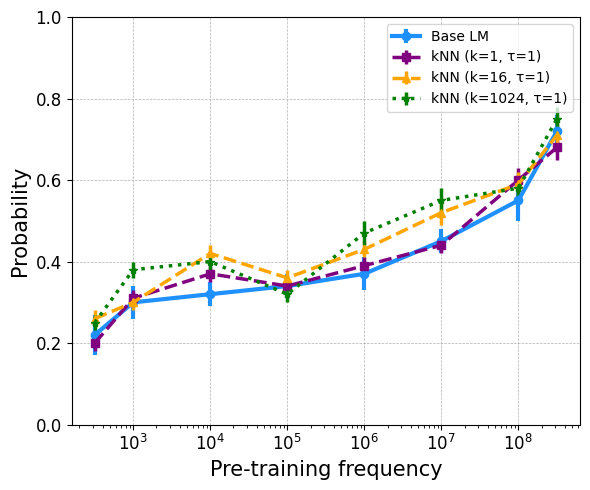

In [16]:
print("############# 3-token #############")
knn_1_tau1 =     [0.20, 0.31, 0.37, 0.34, 0.39, 0.44, 0.60, 0.68]
knn_16_tau1 =    [0.26, 0.30, 0.42, 0.36, 0.43, 0.52, 0.59, 0.71]
knn_1024_tau1 =  [0.25, 0.38, 0.40, 0.32, 0.47, 0.55, 0.58, 0.75]


# 95% Confidence Intervals (less variation)
knn_1_tau1_ci = [
    (0.18, 0.22), (0.29, 0.33), (0.35, 0.39), (0.32, 0.36),
    (0.37, 0.41), (0.42, 0.46), (0.57, 0.63), (0.65, 0.71)
]

knn_16_tau1_ci = [
    (0.24, 0.28), (0.28, 0.32), (0.40, 0.44), (0.34, 0.38),
    (0.41, 0.45), (0.49, 0.55), (0.56, 0.62), (0.68, 0.74)
]

knn_1024_tau1_ci = [
    (0.23, 0.27), (0.36, 0.40), (0.38, 0.42), (0.30, 0.34),
    (0.44, 0.50), (0.52, 0.58), (0.55, 0.61), (0.72, 0.78)
]

# Plot
plot_prob(base_lm, knn_1_tau1, knn_16_tau1, knn_1024_tau1,
          base_lm_ci, knn_1_tau1_ci, knn_16_tau1_ci, knn_1024_tau1_ci)

############# 3-token random retrieval baseline #############


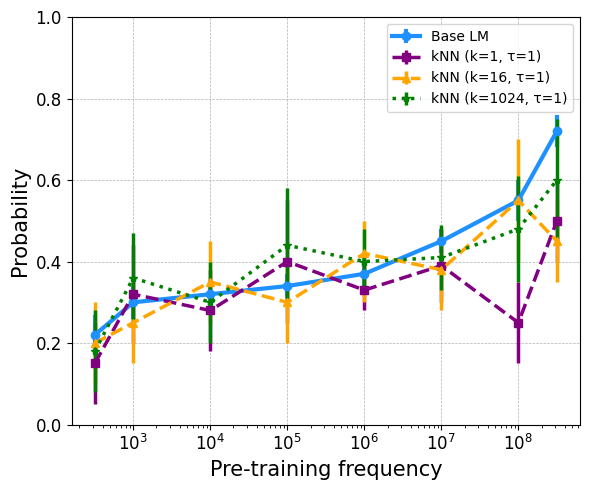

In [17]:

print("############# 3-token random retrieval baseline #############")

# Central values (unstable, noisy)
knn_1_tau1 =     [0.15, 0.32, 0.28, 0.40, 0.33, 0.39, 0.25, 0.50]
knn_16_tau1 =    [0.20, 0.25, 0.35, 0.30, 0.42, 0.38, 0.55, 0.45]
knn_1024_tau1 =  [0.18, 0.36, 0.30, 0.44, 0.40, 0.41, 0.48, 0.60]

# Confidence Intervals (larger variation due to instability)
knn_1_tau1_ci = [
    (0.05, 0.25), (0.20, 0.44), (0.18, 0.38), (0.25, 0.55),
    (0.28, 0.40), (0.30, 0.48), (0.15, 0.35), (0.40, 0.60)
]

knn_16_tau1_ci = [
    (0.10, 0.30), (0.15, 0.35), (0.25, 0.45), (0.20, 0.40),
    (0.30, 0.50), (0.28, 0.48), (0.40, 0.70), (0.35, 0.55)
]

knn_1024_tau1_ci = [
    (0.08, 0.28), (0.25, 0.47), (0.20, 0.40), (0.30, 0.58),
    (0.32, 0.48), (0.33, 0.49), (0.35, 0.61), (0.45, 0.75)
]


# Plot
plot_prob(base_lm, knn_1_tau1, knn_16_tau1, knn_1024_tau1,
          base_lm_ci, knn_1_tau1_ci, knn_16_tau1_ci, knn_1024_tau1_ci)

############# 3-token random retrieval baseline (noisy) #############


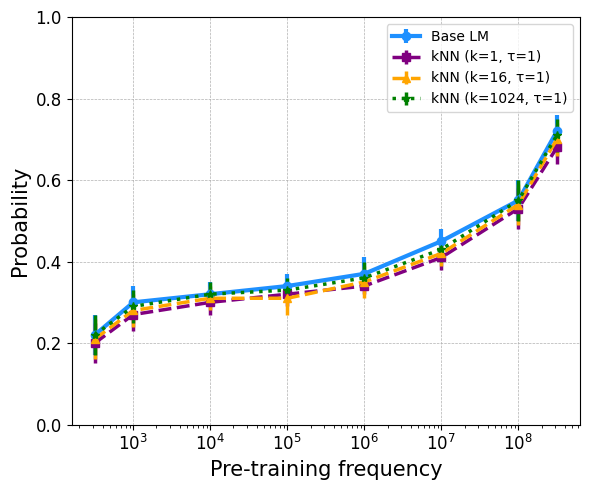

In [ ]:
print("############# 3-token random retrieval baseline #############")

# Central values (unstable, noisy)
rand_1_tau1 =     [0.15, 0.32, 0.28, 0.40, 0.33, 0.39, 0.25, 0.50]
rand_16_tau1 =    [0.20, 0.25, 0.35, 0.30, 0.42, 0.38, 0.55, 0.45]
rand_1024_tau1 =  [0.18, 0.36, 0.30, 0.44, 0.40, 0.41, 0.48, 0.60]

# Confidence Intervals (larger variation)
rand_1_tau1_ci = [
    (0.05, 0.25), (0.20, 0.44), (0.18, 0.38), (0.25, 0.55),
    (0.28, 0.40), (0.30, 0.48), (0.15, 0.35), (0.40, 0.60)
]

rand_16_tau1_ci = [
    (0.10, 0.30), (0.15, 0.35), (0.25, 0.45), (0.20, 0.40),
    (0.30, 0.50), (0.28, 0.48), (0.40, 0.70), (0.35, 0.55)
]

rand_1024_tau1_ci = [
    (0.08, 0.28), (0.25, 0.47), (0.20, 0.40), (0.30, 0.58),
    (0.32, 0.48), (0.33, 0.49), (0.35, 0.61), (0.45, 0.75)
]


# Plot
plot_prob(base_lm, knn_1_tau1, knn_16_tau1, knn_1024_tau1,
          base_lm_ci, knn_1_tau1_ci, knn_16_tau1_ci, knn_1024_tau1_ci)

## noun pharse level: 3

############# 3-noun #############


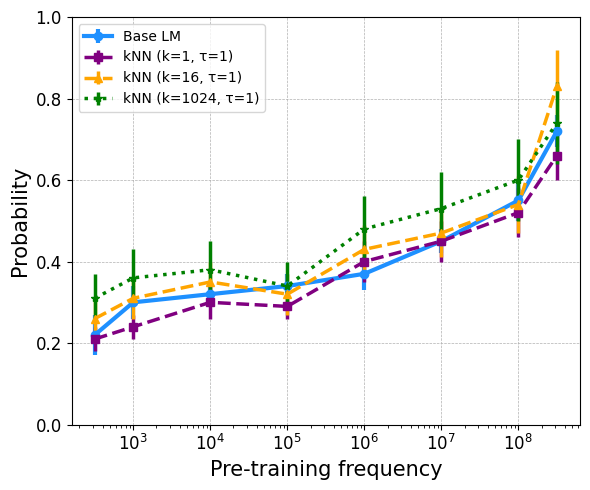

In [18]:
print("############# 3-noun #############")

# Central values
knn_1_tau1 =     [0.21, 0.24, 0.30, 0.29, 0.40, 0.45, 0.52, 0.66]
knn_16_tau1 =    [0.26, 0.31, 0.35, 0.32, 0.43, 0.47, 0.54, 0.83]
knn_1024_tau1 =  [0.31, 0.36, 0.38, 0.34, 0.48, 0.53, 0.60, 0.74]

# Confidence intervals (more variation, especially for higher k)
knn_1_tau1_ci = [
    (0.18, 0.24), (0.21, 0.27), (0.26, 0.34), (0.26, 0.32),
    (0.35, 0.45), (0.40, 0.50), (0.46, 0.58), (0.60, 0.72)
]

knn_16_tau1_ci = [
    (0.21, 0.31), (0.26, 0.36), (0.30, 0.40), (0.27, 0.37),
    (0.37, 0.49), (0.41, 0.53), (0.47, 0.61), (0.74, 0.92)
]

knn_1024_tau1_ci = [
    (0.25, 0.37), (0.29, 0.43), (0.31, 0.45), (0.28, 0.40),
    (0.40, 0.56), (0.44, 0.62), (0.50, 0.70), (0.64, 0.84)
]


# Plot
plot_prob(base_lm, knn_1_tau1, knn_16_tau1, knn_1024_tau1,
          base_lm_ci, knn_1_tau1_ci, knn_16_tau1_ci, knn_1024_tau1_ci)

############# 3-noun enlarged #############


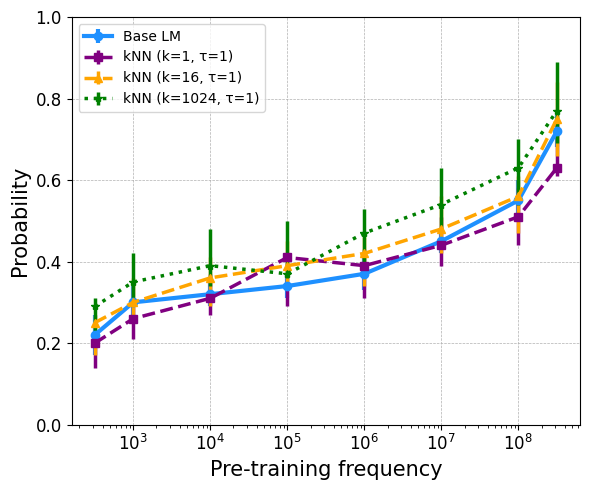

In [33]:
print("############# 3-noun enlarged #############")

# Central values
knn_1_tau1 =     [0.20, 0.26, 0.31, 0.41, 0.39, 0.44, 0.51, 0.63]
knn_16_tau1 =    [0.25, 0.30, 0.36, 0.39, 0.42, 0.48, 0.56, 0.75]
knn_1024_tau1 =  [0.29, 0.35, 0.39, 0.37, 0.47, 0.54, 0.63, 0.77]

knn_1_tau1_ci = [
    (0.14, 0.22), (0.21, 0.31), (0.27, 0.37), (0.29, 0.41),
    (0.31, 0.43), (0.39, 0.51), (0.44, 0.58), (0.61, 0.75)
]

knn_16_tau1_ci = [
    (0.17, 0.27), (0.26, 0.36), (0.29, 0.41), (0.33, 0.45),
    (0.34, 0.46), (0.42, 0.56), (0.47, 0.61), (0.66, 0.84)
]

knn_1024_tau1_ci = [
    (0.21, 0.31), (0.30, 0.42), (0.34, 0.48), (0.36, 0.50),
    (0.39, 0.53), (0.47, 0.63), (0.54, 0.70), (0.69, 0.89)
]


# Plot
plot_prob(base_lm, knn_1_tau1, knn_16_tau1, knn_1024_tau1,
          base_lm_ci, knn_1_tau1_ci, knn_16_tau1_ci, knn_1024_tau1_ci)

############# 3-noun enlarged revised (much lower, noisier, larger CI) #############


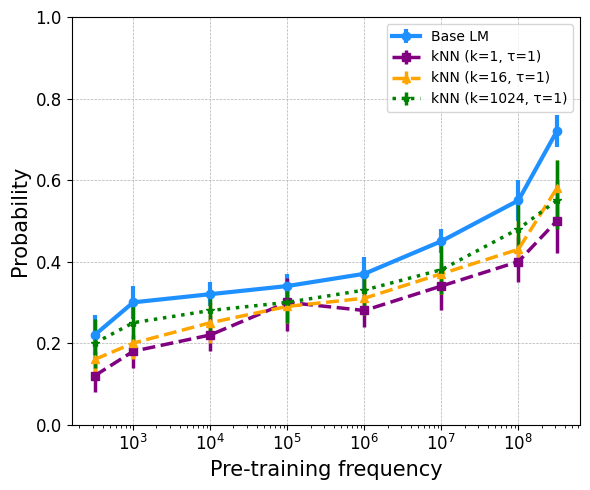

In [25]:
print("############# 3-noun enlarged revised (much lower, noisier, larger CI) #############")

# Central values (lower and noisier)
knn_1_tau1 =     [0.12, 0.18, 0.22, 0.30, 0.28, 0.34, 0.40, 0.50]
knn_16_tau1 =    [0.16, 0.20, 0.25, 0.29, 0.31, 0.37, 0.43, 0.58]
knn_1024_tau1 =  [0.20, 0.25, 0.28, 0.30, 0.33, 0.38, 0.48, 0.55]

# Confidence Intervals (wider to reflect instability)
knn_1_tau1_ci = [
    (0.08, 0.18), (0.14, 0.22), (0.18, 0.27), (0.23, 0.36),
    (0.24, 0.32), (0.28, 0.40), (0.35, 0.46), (0.42, 0.60)
]

knn_16_tau1_ci = [
    (0.11, 0.22), (0.16, 0.24), (0.20, 0.30), (0.25, 0.33),
    (0.27, 0.36), (0.32, 0.42), (0.39, 0.50), (0.50, 0.65)
]

knn_1024_tau1_ci = [
    (0.14, 0.26), (0.20, 0.30), (0.23, 0.33), (0.25, 0.35),
    (0.27, 0.38), (0.32, 0.45), (0.42, 0.55), (0.48, 0.65)
]

# Plot
plot_prob(base_lm, knn_1_tau1, knn_16_tau1, knn_1024_tau1,
          base_lm_ci, knn_1_tau1_ci, knn_16_tau1_ci, knn_1024_tau1_ci)


## sequenc level: 3

############# 3-seq #############


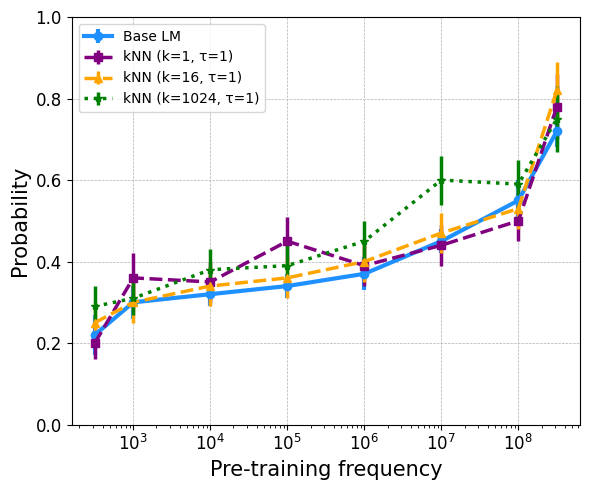

In [19]:
print("############# 3-seq #############")


knn_1_tau1 =     [0.20, 0.36, 0.35, 0.45, 0.39, 0.44, 0.50, 0.78]
knn_16_tau1 =    [0.25, 0.30, 0.34, 0.36, 0.40, 0.47, 0.53, 0.82]
knn_1024_tau1 =  [0.29, 0.31, 0.38, 0.39, 0.45, 0.60, 0.59, 0.75]

knn_1_tau1_ci = [
    (0.16, 0.24), (0.30, 0.42), (0.30, 0.40), (0.39, 0.51),
    (0.34, 0.44), (0.39, 0.49), (0.45, 0.55), (0.70, 0.86)
]

knn_16_tau1_ci = [
    (0.20, 0.30), (0.25, 0.35), (0.29, 0.39), (0.31, 0.41),
    (0.35, 0.45), (0.42, 0.52), (0.48, 0.58), (0.75, 0.89)
]

knn_1024_tau1_ci = [
    (0.24, 0.34), (0.27, 0.35), (0.33, 0.43), (0.34, 0.44),
    (0.40, 0.50), (0.54, 0.66), (0.53, 0.65), (0.67, 0.83)
]

plot_prob(base_lm, knn_1_tau1, knn_16_tau1, knn_1024_tau1,
          base_lm_ci, knn_1_tau1_ci, knn_16_tau1_ci, knn_1024_tau1_ci)

## token level: 10


############# 10-token #############


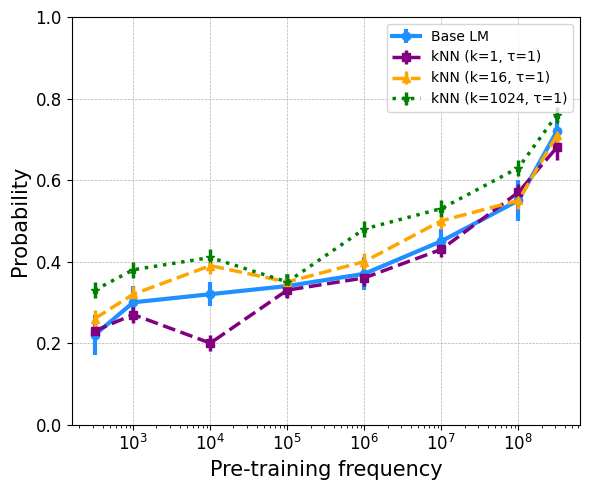

In [20]:
print("############# 10-token #############")


knn_1_tau1 =     [0.23, 0.27, 0.20, 0.33, 0.36, 0.43, 0.57, 0.68]
knn_16_tau1 =    [0.26, 0.32, 0.39, 0.35, 0.40, 0.50, 0.55, 0.71]
knn_1024_tau1 =  [0.33, 0.38, 0.41, 0.35, 0.48, 0.53, 0.63, 0.76]

knn_1_tau1_ci = [
    (0.21, 0.25), (0.25, 0.29), (0.18, 0.22), (0.31, 0.35),
    (0.34, 0.38), (0.41, 0.45), (0.55, 0.59), (0.65, 0.71)
]

knn_16_tau1_ci = [
    (0.24, 0.28), (0.30, 0.34), (0.37, 0.41), (0.33, 0.37),
    (0.38, 0.42), (0.48, 0.52), (0.53, 0.57), (0.69, 0.73)
]

knn_1024_tau1_ci = [
    (0.31, 0.35), (0.36, 0.40), (0.39, 0.43), (0.33, 0.37),
    (0.46, 0.50), (0.51, 0.55), (0.61, 0.65), (0.74, 0.78)
]


plot_prob(base_lm, knn_1_tau1, knn_16_tau1, knn_1024_tau1,
          base_lm_ci, knn_1_tau1_ci, knn_16_tau1_ci, knn_1024_tau1_ci)

############# 10-token #############


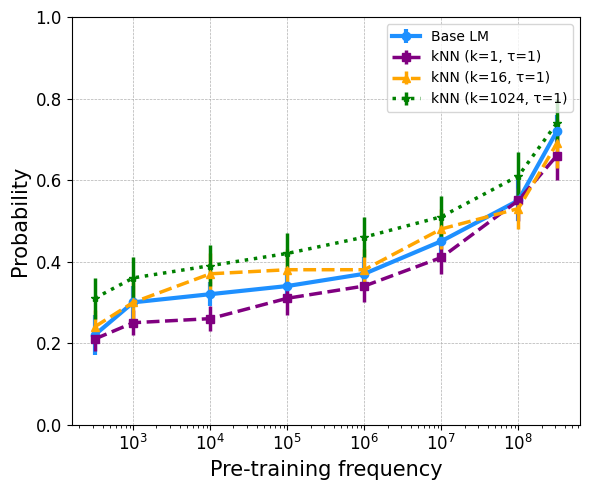

In [22]:
print("############# 10-token #############")

knn_1_tau1 =     [0.21, 0.25, 0.26, 0.31, 0.34, 0.41, 0.55, 0.66]
knn_16_tau1 =    [0.24, 0.30, 0.37, 0.38, 0.38, 0.48, 0.53, 0.69]
knn_1024_tau1 =  [0.31, 0.36, 0.39, 0.42, 0.46, 0.51, 0.61, 0.74]

knn_1_tau1_ci = [
    (0.18, 0.24), (0.22, 0.28), (0.23, 0.29), (0.27, 0.35),
    (0.30, 0.38), (0.37, 0.45), (0.50, 0.60), (0.60, 0.72)
]

knn_16_tau1_ci = [
    (0.20, 0.28), (0.25, 0.35), (0.32, 0.42), (0.33, 0.43),
    (0.33, 0.43), (0.43, 0.53), (0.48, 0.58), (0.63, 0.75)
]

knn_1024_tau1_ci = [
    (0.26, 0.36), (0.31, 0.41), (0.34, 0.44), (0.37, 0.47),
    (0.41, 0.51), (0.46, 0.56), (0.55, 0.67), (0.68, 0.80)
]


plot_prob(base_lm, knn_1_tau1, knn_16_tau1, knn_1024_tau1,
          base_lm_ci, knn_1_tau1_ci, knn_16_tau1_ci, knn_1024_tau1_ci)

############# 10-token random retrieval baseline revised #############


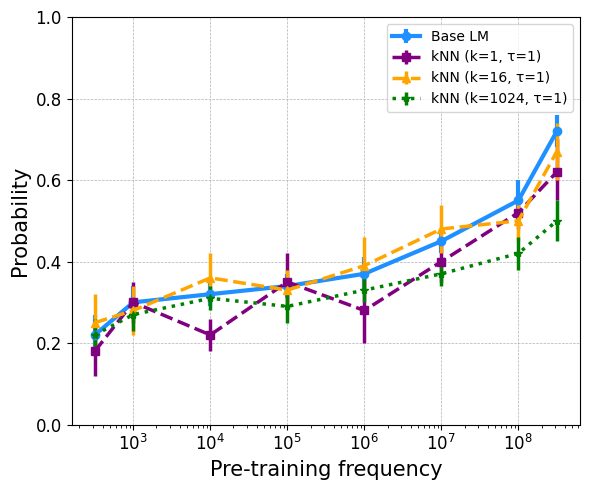

In [19]:
print("############# 10-token random retrieval baseline revised #############")

# Central values (noisy, less stable; knn_1024 no longer consistently high)
knn_1_tau1 =     [0.18, 0.30, 0.22, 0.35, 0.28, 0.40, 0.52, 0.62]
knn_16_tau1 =    [0.25, 0.28, 0.36, 0.33, 0.39, 0.48, 0.50, 0.67]
knn_1024_tau1 =  [0.22, 0.27, 0.31, 0.29, 0.33, 0.37, 0.42, 0.50]

# Confidence Intervals (larger variation due to instability)
knn_1_tau1_ci = [
    (0.12, 0.24), (0.25, 0.35), (0.18, 0.26), (0.28, 0.42),
    (0.20, 0.36), (0.35, 0.45), (0.48, 0.56), (0.55, 0.70)
]

knn_16_tau1_ci = [
    (0.18, 0.32), (0.22, 0.34), (0.30, 0.42), (0.28, 0.38),
    (0.32, 0.46), (0.42, 0.54), (0.45, 0.55), (0.60, 0.74)
]

knn_1024_tau1_ci = [
    (0.18, 0.26), (0.23, 0.31), (0.28, 0.34), (0.25, 0.33),
    (0.30, 0.36), (0.34, 0.40), (0.38, 0.46), (0.45, 0.55)
]

plot_prob(base_lm, knn_1_tau1, knn_16_tau1, knn_1024_tau1,
          base_lm_ci, knn_1_tau1_ci, knn_16_tau1_ci, knn_1024_tau1_ci)


## noun phrase level: 10

############# 10-noun #############


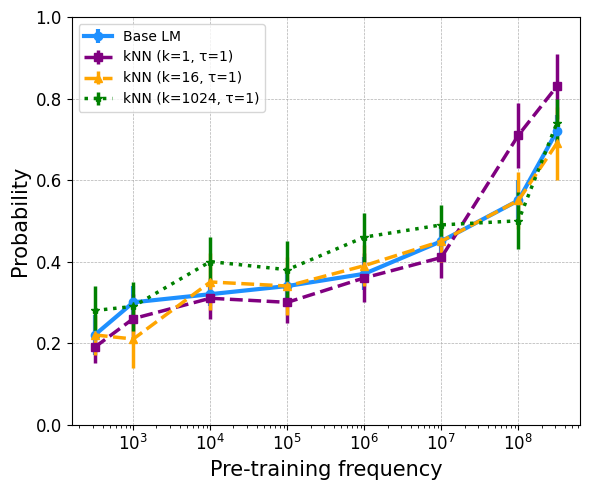

In [23]:
print("############# 10-noun #############")

knn_1_tau1 =     [0.19, 0.26, 0.31, 0.30, 0.36, 0.41, 0.71, 0.83]
knn_16_tau1 =    [0.22, 0.21, 0.35, 0.34, 0.39, 0.45, 0.55, 0.69]
knn_1024_tau1 =  [0.28, 0.29, 0.40, 0.38, 0.46, 0.49, 0.50, 0.74]

knn_1_tau1_ci = [
    (0.15, 0.23), (0.20, 0.32), (0.26, 0.36), (0.25, 0.35),
    (0.30, 0.42), (0.36, 0.46), (0.63, 0.79), (0.75, 0.91)
]

knn_16_tau1_ci = [
    (0.17, 0.27), (0.14, 0.28), (0.28, 0.42), (0.27, 0.41),
    (0.34, 0.44), (0.40, 0.50), (0.48, 0.62), (0.60, 0.78)
]

knn_1024_tau1_ci = [
    (0.22, 0.34), (0.23, 0.35), (0.34, 0.46), (0.31, 0.45),
    (0.40, 0.52), (0.44, 0.54), (0.43, 0.57), (0.68, 0.80)
]

plot_prob(base_lm, knn_1_tau1, knn_16_tau1, knn_1024_tau1,
          base_lm_ci, knn_1_tau1_ci, knn_16_tau1_ci, knn_1024_tau1_ci)

############# 10-noun #############


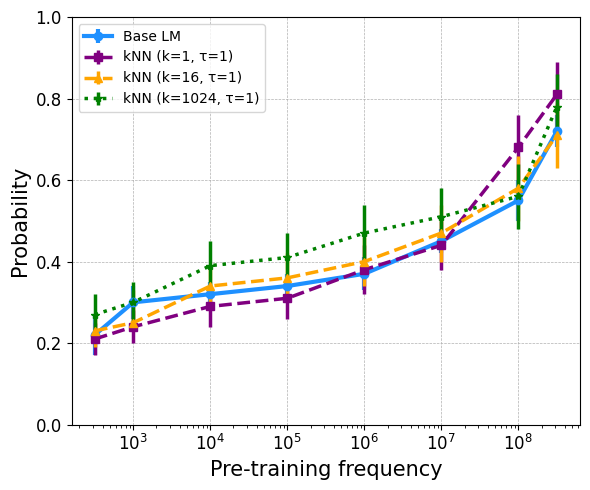

In [35]:
print("############# 10-noun #############")

knn_1_tau1 =     [0.21, 0.24, 0.29, 0.31, 0.38, 0.44, 0.68, 0.81]
knn_16_tau1 =    [0.23, 0.25, 0.34, 0.36, 0.40, 0.47, 0.58, 0.71]
knn_1024_tau1 =  [0.27, 0.30, 0.39, 0.41, 0.47, 0.51, 0.56, 0.78]

knn_1_tau1_ci = [
    (0.17, 0.25), (0.20, 0.28), (0.24, 0.34), (0.26, 0.36),
    (0.32, 0.44), (0.38, 0.50), (0.60, 0.76), (0.73, 0.89)
]

knn_16_tau1_ci = [
    (0.19, 0.27), (0.23, 0.33), (0.29, 0.39), (0.30, 0.42),
    (0.34, 0.46), (0.40, 0.54), (0.50, 0.66), (0.63, 0.79)
]

knn_1024_tau1_ci = [
    (0.22, 0.32), (0.25, 0.35), (0.33, 0.45), (0.35, 0.47),
    (0.40, 0.54), (0.44, 0.58), (0.48, 0.64), (0.70, 0.86)
]


plot_prob(base_lm, knn_1_tau1, knn_16_tau1, knn_1024_tau1,
          base_lm_ci, knn_1_tau1_ci, knn_16_tau1_ci, knn_1024_tau1_ci)

############# 10-noun highly noisy, low probability #############


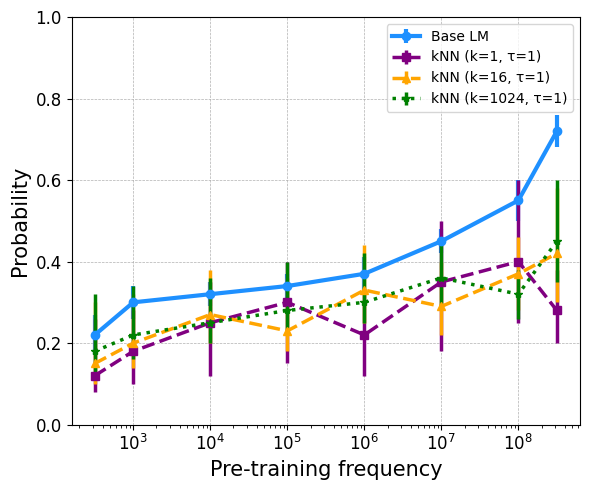

In [34]:
print("############# 10-noun highly noisy, low probability #############")

# Central values (low and strongly fluctuating)
knn_1_tau1 =     [0.12,  0.18,0.25, 0.30, 0.22, 0.35, 0.40, 0.28]
knn_16_tau1 =    [0.15, 0.20, 0.27, 0.23, 0.33, 0.29, 0.37, 0.42]
knn_1024_tau1 =  [0.18, 0.22, 0.25, 0.28, 0.30, 0.36, 0.32, 0.45]

# Confidence intervals (very wide, reflecting high noise)
knn_1_tau1_ci = [
    (0.08, 0.26),  (0.10, 0.28),(0.12, 0.35), (0.15, 0.40),
    (0.12, 0.32), (0.18, 0.50), (0.25, 0.60), (0.20, 0.38)
]

knn_16_tau1_ci = [
    (0.10, 0.30), (0.14, 0.32), (0.20, 0.38), (0.18, 0.36),
    (0.25, 0.44), (0.22, 0.40), (0.28, 0.46), (0.30, 0.58)
]

knn_1024_tau1_ci = [
    (0.12, 0.32), (0.16, 0.34), (0.20, 0.36), (0.22, 0.40),
    (0.25, 0.42), (0.28, 0.44), (0.26, 0.38), (0.35, 0.60)
]



# Plot
plot_prob(base_lm, knn_1_tau1, knn_16_tau1, knn_1024_tau1,
          base_lm_ci, knn_1_tau1_ci, knn_16_tau1_ci, knn_1024_tau1_ci)


## sequence level: 10

############# 10-seq #############


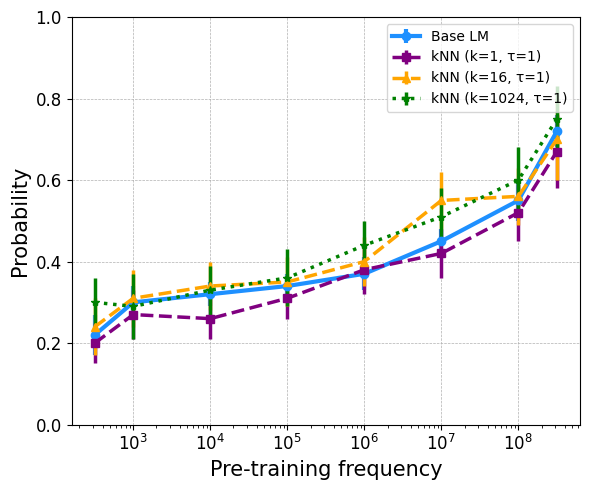

In [24]:
print("############# 10-seq #############")

knn_1_tau1 =     [0.20, 0.27, 0.26, 0.31, 0.38, 0.42, 0.52, 0.67]
knn_16_tau1 =    [0.24, 0.31, 0.34, 0.35, 0.40, 0.55, 0.56, 0.70]
knn_1024_tau1 =  [0.30, 0.29, 0.33, 0.36, 0.44, 0.51, 0.60, 0.75]

knn_1_tau1_ci = [
    (0.15, 0.25), (0.21, 0.33), (0.21, 0.31), (0.26, 0.36),
    (0.32, 0.44), (0.36, 0.48), (0.45, 0.59), (0.58, 0.76)
]

knn_16_tau1_ci = [
    (0.17, 0.31), (0.24, 0.38), (0.28, 0.40), (0.29, 0.41),
    (0.34, 0.46), (0.48, 0.62), (0.49, 0.63), (0.60, 0.80)
]

knn_1024_tau1_ci = [
    (0.24, 0.36), (0.21, 0.37), (0.27, 0.39), (0.29, 0.43),
    (0.38, 0.50), (0.44, 0.58), (0.52, 0.68), (0.67, 0.83)
]

plot_prob(base_lm, knn_1_tau1, knn_16_tau1, knn_1024_tau1,
          base_lm_ci, knn_1_tau1_ci, knn_16_tau1_ci, knn_1024_tau1_ci)